<img src="https://i.postimg.cc/Qt4q5gpR/inkpx-word-art.png">


<b> Group Details:</b>

1. Amol Mehra (BITS ID:2022DC04286)
2. Rajan Mishra(BITS ID:2022DC04362)
3. Muktasha Mithora(BITS ID:2022DC04276)
4. Aman Mishra (BITS ID:2022DC04423)

<h1><b><p style="background-image: url(https://i.postimg.cc/ZK8sS4cQ/Free-Wallpaper-Cartoon-Blue-Background-Images-Cartoon-Blue-Watercolor-Background-Material-Ocean.png);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step1 | Python Libraries</p></b></h1>


In [1]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

<h1><b><p style="background-image: url(https://i.postimg.cc/ZK8sS4cQ/Free-Wallpaper-Cartoon-Blue-Background-Images-Cartoon-Blue-Watercolor-Background-Material-Ocean.png);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step2 | Data</p></b></h1>


<h2><b><span style="color:navy">💧 Step 2.1 | </span><span style="color:blue">Importing Data</span></b></h2>


In [2]:
# Reading the csv file containing data

df=pd.read_csv("Assignment-1_Set-8_Dataset.csv")


In [3]:
# Printing any 2 rows for data sanity check

df.sample(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1215,7.968526,156.451149,27008.011874,4.716577,NaN,455.840428,8.360283,52.501187,3.173879,1
127,7.371085,207.716824,24913.837166,9.616330,362.30018,363.168538,11.542662,67.720704,4.412590,0


<h2><b><span style="color:navy">💧 Step 2.2 | </span><span style="color:blue">Data Informations</span></b></h2>

In [4]:
# Display concise summary of DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# Retrieve the dimensions of the DataFrame
df.shape

(3276, 10)

In [6]:
# Generate descriptive statistics for the DataFrame
df.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)


,min,50%,mean,max,std
ph,0.000000,7.036752,7.080795,14.000000,1.594320
Hardness,47.432000,196.967627,196.369496,323.124000,32.879761
Solids,320.942611,20927.833607,22014.092526,61227.196008,8768.570828
Chloramines,0.352000,7.130299,7.122277,13.127000,1.583085
Sulfate,129.000000,333.073546,333.775777,481.030642,41.416840
Conductivity,181.483754,421.884968,426.205111,753.342620,80.824064
Organic_carbon,2.200000,14.218338,14.284970,28.300000,3.308162
Trihalomethanes,0.738000,66.622485,66.396293,124.000000,16.175008
Turbidity,1.450000,3.955028,3.966786,6.739000,0.780382
Potability,0.000000,0.000000,0.390110,1.000000,0.487849


In [7]:
# Get the column names of the DataFrame
columns_name = df.columns
for index, col_name in enumerate(columns_name):
    print(index, col_name)

0 ph
1 Hardness
2 Solids
3 Chloramines
4 Sulfate
5 Conductivity
6 Organic_carbon
7 Trihalomethanes
8 Turbidity
9 Potability


<h2><b><span style="color:navy">💧 Step 2.3 | </span><span style="color:blue">Columns Explanation</span></b></h2>

<div style="border:5px solid navy; border-radius:20px; padding: 15px; font-family:Arial">
<h3><b>1. pH value:</b></h3>
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

<h3><b>2. Hardness:</b></h3>
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

<h3><b>3. Solids (Total dissolved solids - TDS):</b></h3>
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

<h3><b>4. Chloramines:</b></h3>
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

<h3><b>5. Sulfate:</b></h3>
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

<h3><b>6. Conductivity:</b></h3>
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

<h3><b>7. Organic_carbon:</b></h3>
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

<h3><b>8. Trihalomethanes:</b></h3>
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

<h3><b>9. Turbidity:</b></h3>
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

<h3><b>10. Potability:</b></h3>
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.
</div>

<h2><b><span style="color:navy">💧 Step 2.4 | </span><span style="color:blue">Checking of class imbalance</span></b></h2>

Potability
0    1998
1    1278
Name: count, dtype: int64

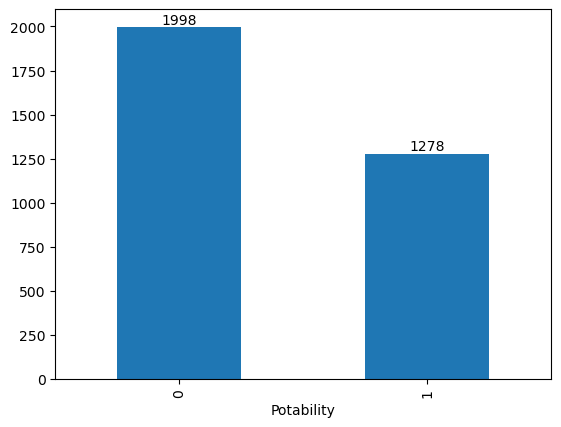

In [8]:
# Create a bar plot of the 'Potability' column
ax = df['Potability'].value_counts().plot(kind='bar')

# Add labels to each bar in the plot
for i in ax.containers:
    ax.bar_label(i)

# Display the counts of unique values in the 'Potability' column
df['Potability'].value_counts()

<u> Class Imbalance seems to be observed in the data for which measures will be taken while model training.</u>



<h1><b><p style="background-image: url(https://i.postimg.cc/ZK8sS4cQ/Free-Wallpaper-Cartoon-Blue-Background-Images-Cartoon-Blue-Watercolor-Background-Material-Ocean.png);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step3 | Visualizations</p></b></h1>

<h2><b><span style="color:navy">💧 Step 3.1 | </span><span style="color:blue">Correlation</span></b></h2>

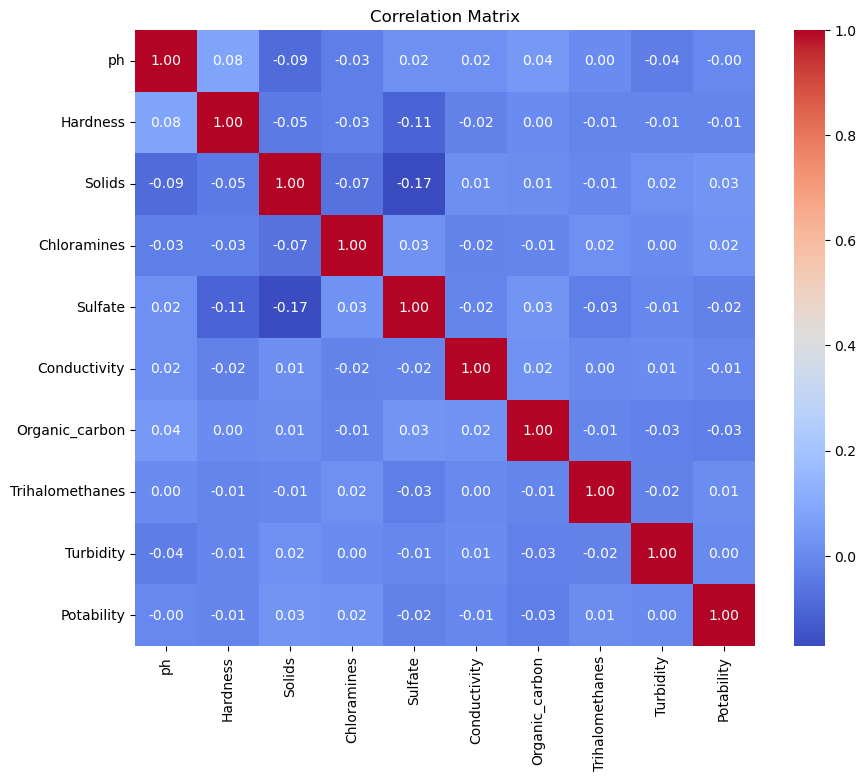

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<div style="font-size:130%; font-weight:500; background-color:#edfeff">➡️ The correlation figure suggests that none of the independent variable is correlated.</div>



<h2><b><span style="color:navy">💧 Step 3.2 | </span><span style="color:blue">Plots</span></b></h2>

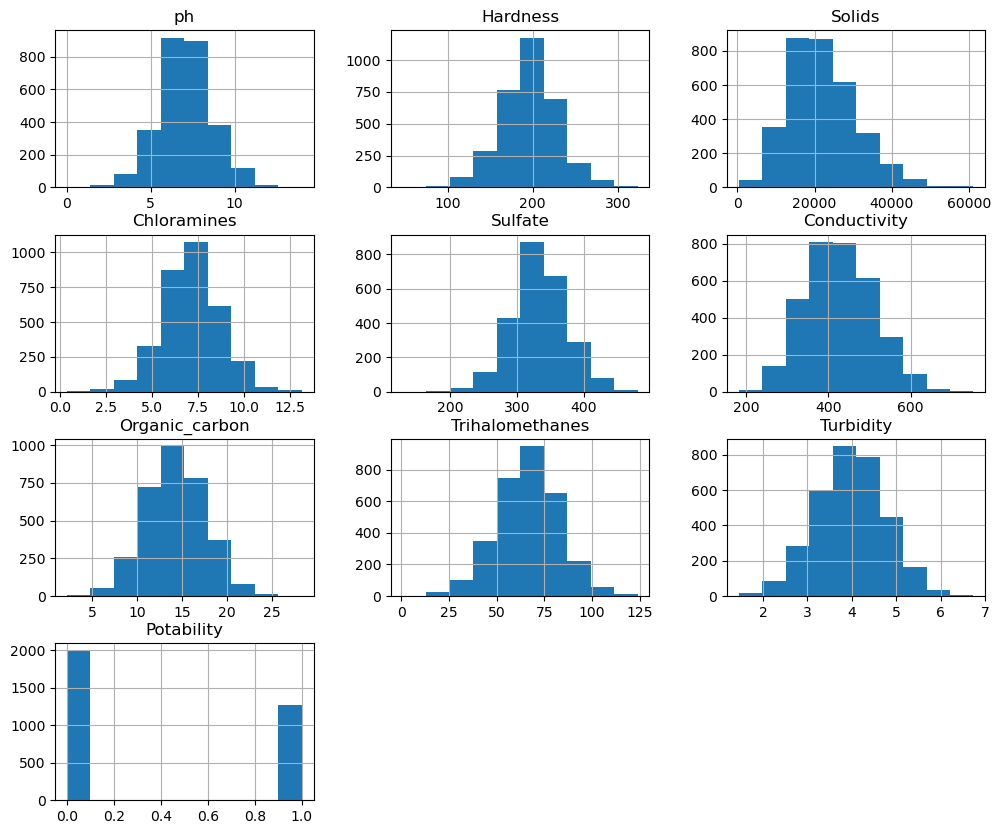

In [10]:
# Plotting Histograms for each parameter in data

df.hist(figsize=(12,10))
plt.show()


<div style="font-size:130%; font-weight:500; background-color:#edfeff">➡️ The Histograms suggest that the parameters are almost normally distributed.</div>


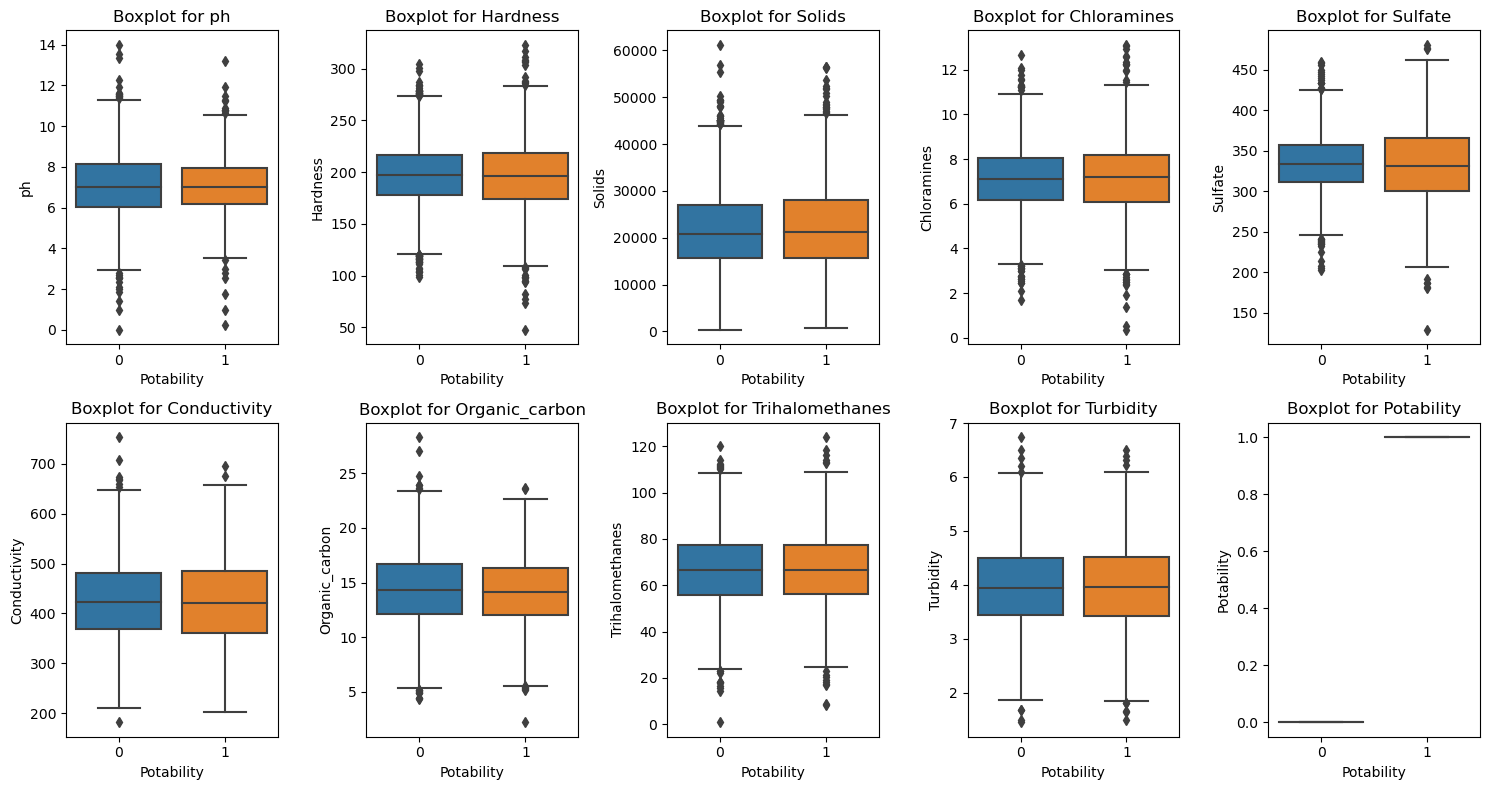

In [11]:

# DataFrame is named 'df'
fig, axes = plt.subplots(2, 5, figsize=(15, 8))  # Create a 2x5 grid of subplots

# Iterate over the columns and create individual boxplots
for i, column in enumerate(df.columns[:10]):  # Adjust the number of columns as needed
    row, col = divmod(i, 5)  # Calculate the row and column indices
    sns.boxplot(y=df[column], ax=axes[row, col],x=df["Potability"])
    axes[row, col].set_title(f'Boxplot for {column}')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



<div style="font-size:130%; font-weight:500; background-color:#edfeff">➡️ The box plots are suggesting that their is no major outlier and the median for both the values of Potability are almost equal.</div>


C:\Users\Public\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


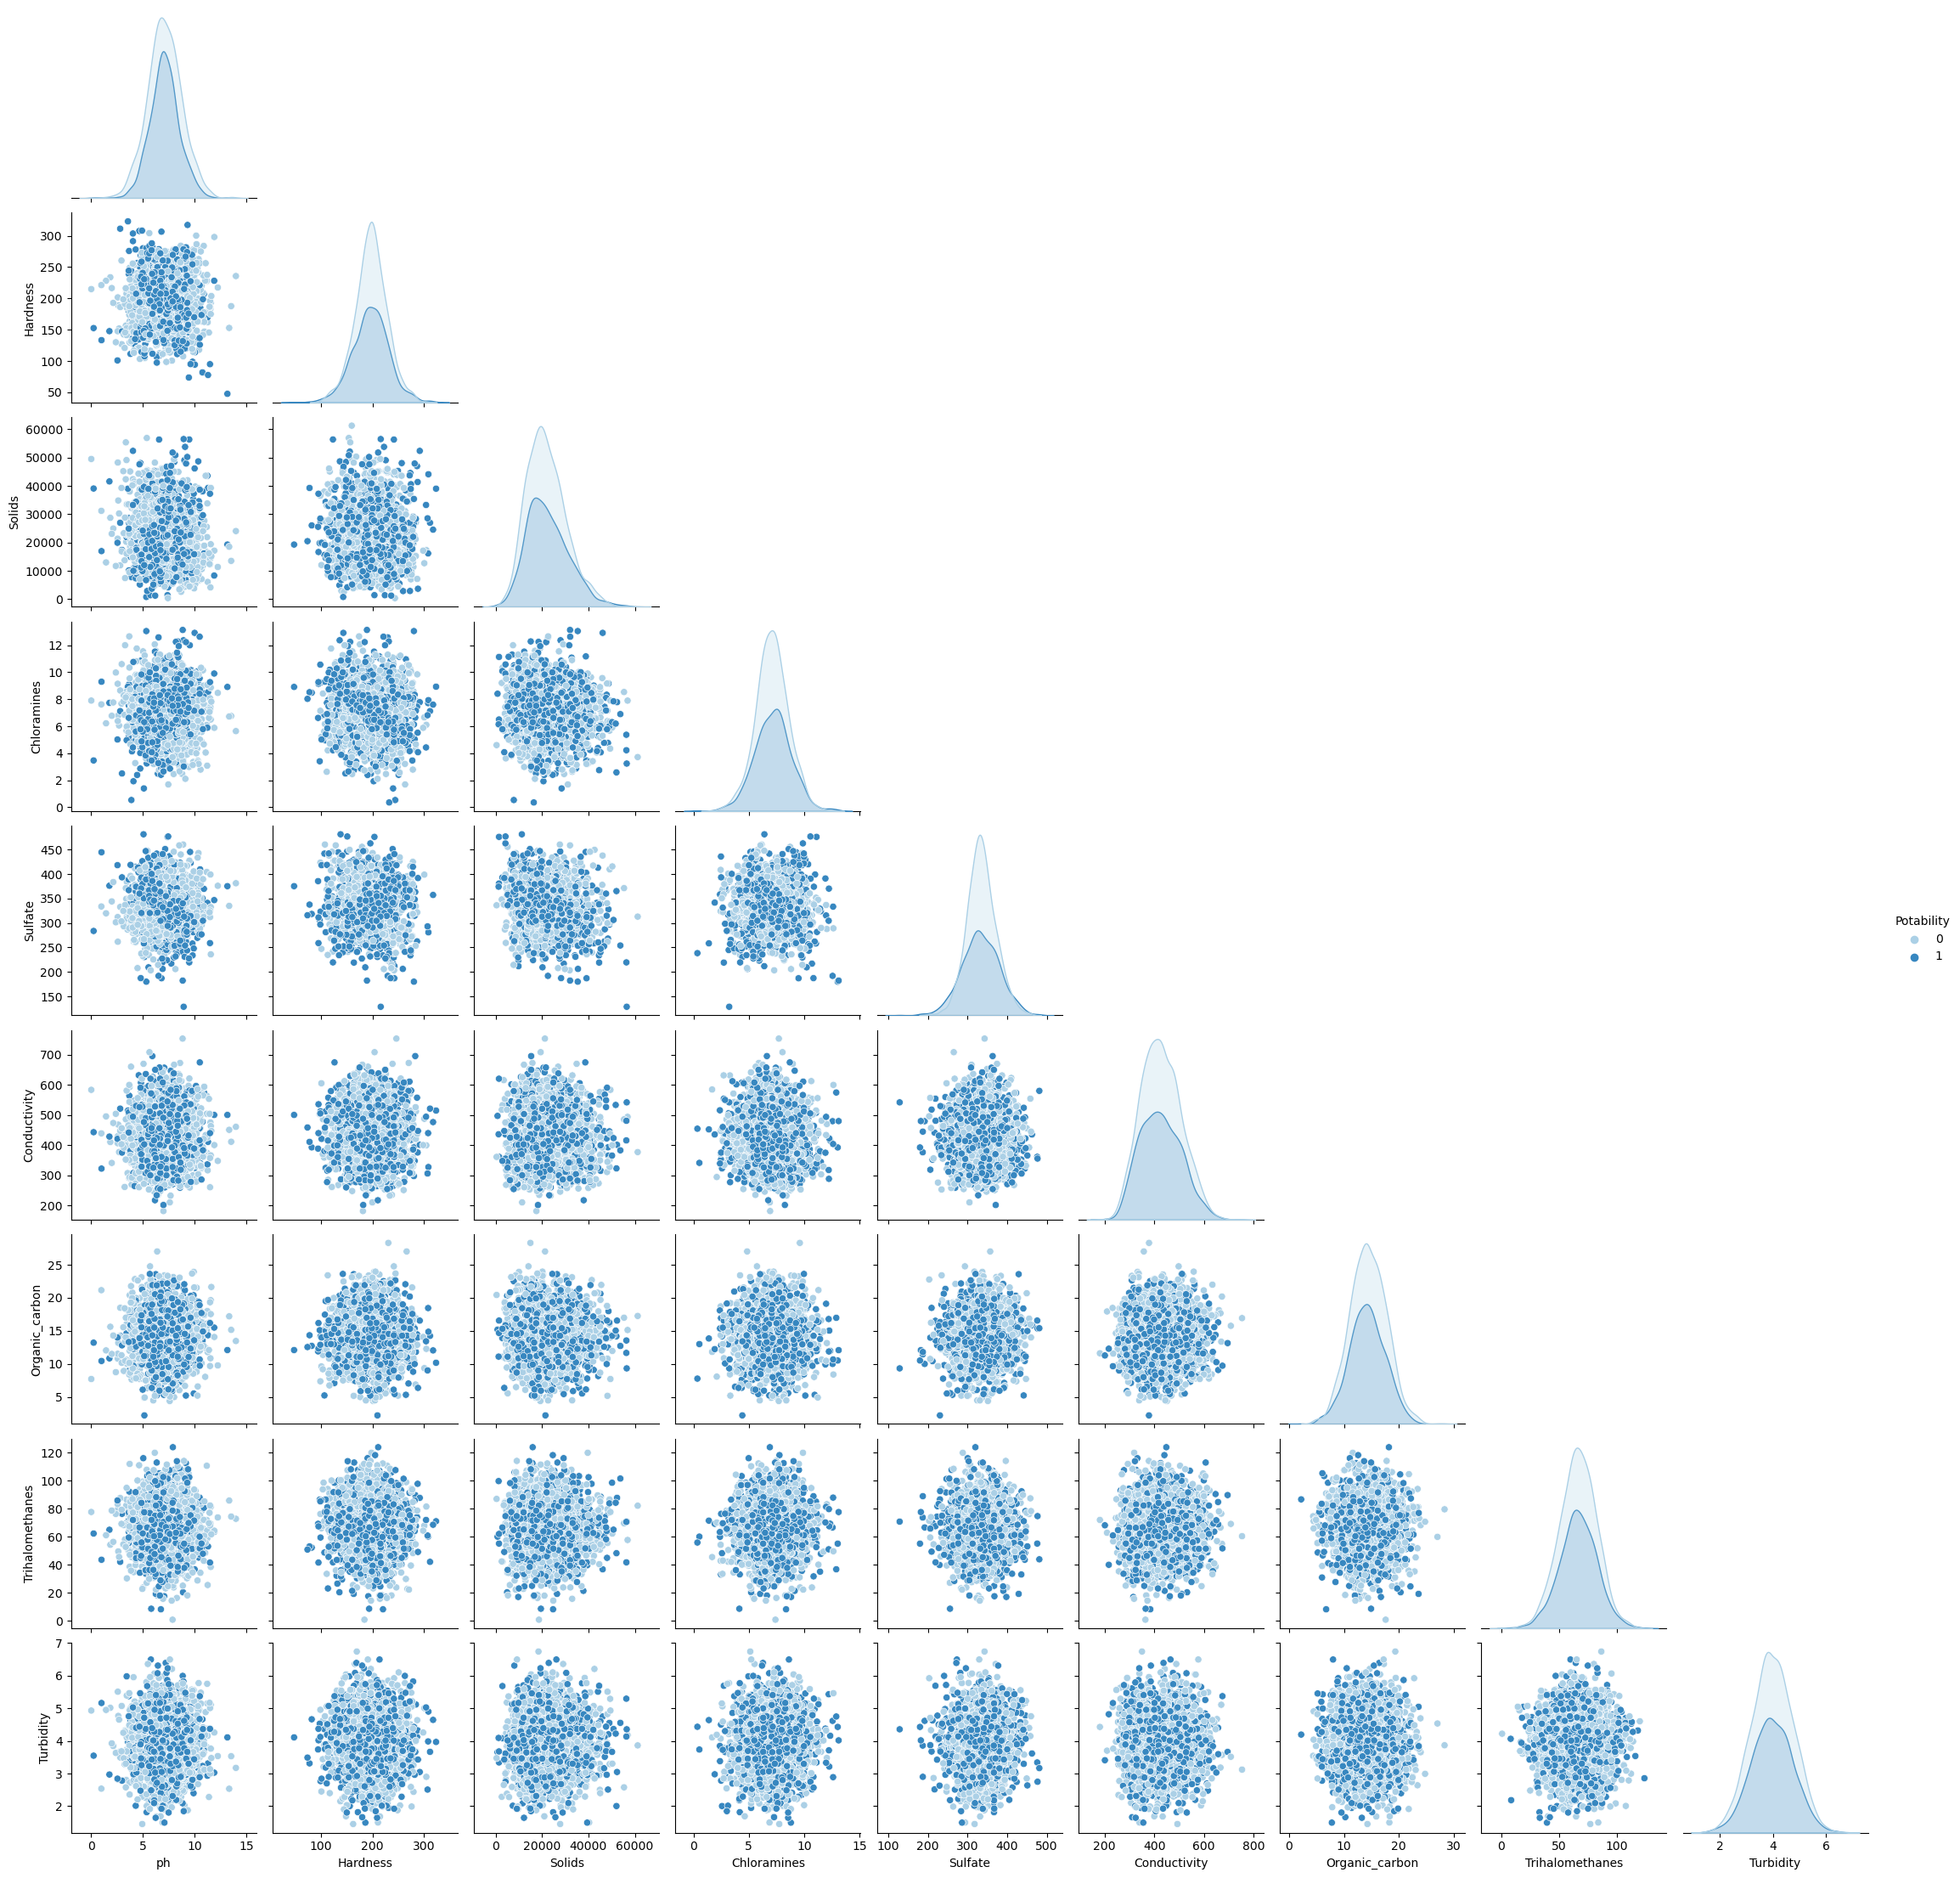

In [12]:
sns.pairplot(df, hue='Potability', corner=True, palette='Blues')
plt.show()

<div style="font-size:130%; font-weight:500; background-color:#edfeff">➡️ Paiplot also suggesting no logical correlation.</div>



<a>

 <h1><b><p style="background-image: url(https://i.postimg.cc/ZK8sS4cQ/Free-Wallpaper-Cartoon-Blue-Background-Images-Cartoon-Blue-Watercolor-Background-Material-Ocean.png);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step4 | Preprocessing</p>
    

 

<h2><b><span style="color:navy">💧 Step 4.1 | </span><span style="color:blue">Missing Values Handling</span></b></h2>


In [13]:
# Checking the number of null values present in data
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [14]:
print('Percentage(%) of nulls for each columns : \n')
print((df.isna().sum()/len(df))*100)

Percentage(%) of nulls for each columns : 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


<div style="font-size:120%; font-weight:500; background-color:#edfeff"><p></p>➡️ Columns with missing values :</p>


 - ph (14.9%)
 - Sulfate (23.8%)
 - Trihalomethanes(4.9%)

</div>


In [15]:
print("Mean of ph values :",df["ph"].mean())
print("Median of ph values :",df["ph"].median())

Mean of ph values : 7.080794504276835
Median of ph values : 7.036752103833548


In [16]:
print("Mean of Sulfate values :",df["Sulfate"].mean())
print("Median of Sulfate values :",df["Sulfate"].median())

Mean of Sulfate values : 333.7757766108135
Median of Sulfate values : 333.073545745888


In [17]:
print("Mean of Trihalomethanes values :",df["Trihalomethanes"].mean())
print("Median of Trihalomethanes values :",df["Trihalomethanes"].median())

Mean of Trihalomethanes values : 66.39629294676803
Median of Trihalomethanes values : 66.62248509808484


<div style="font-size:120%; font-weight:500; background-color:#edfeff"><p></p>➡️ Looking at the mean and median values of attributes consist of missing/null values. The mean and median for ph,Sulphate and Trihalomethanes are almost similar. That means the data doesnt consist of extreme outliers. </p>
<p>➡️Replace them all with their meadians</p>
</div>

In [18]:
# Fiiling the missing values

df['ph'].fillna(df['ph'].median(),inplace=True)
df['Sulfate'].fillna(df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(),inplace=True)

In [19]:
# Again Checking the number of null values present in data
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<h2><b><span style="color:navy">💧 Step 4.2 | </span><span style="color:blue">Standardization</span></b></h2>

<div style="border:5px solid navy; border-radius:20px; padding: 15px; font-family:Arial">
<h3><b>Standardization (Z-score normalization)</b></h3>


1. Purpose: Standardization scales the data so that it has a mean of 0 and a standard deviation of 1. It centers the data around 0, with a unit standard deviation.
2. When to use:
When the features in your dataset have different units or scales.
When the algorithm you are using assumes that the features are normally distributed (e.g., linear regression, logistic regression, and support vector machines).
When you want to compare different features on equal footing or interpret the importance of features based on their standardized coefficients.

3. Result: Since the features in our data are normally distributed and we want to use our parameters on equal fitting Standardisation is selected for our use case.

In [20]:
# Features (X) are obtained by dropping the 'Potability' column
X = df.drop(columns=['Potability'])

# Target variable (y) is set to the 'Potability' column
y = df['Potability']


In [21]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_standardized = pd.DataFrame(scaler.fit_transform(X))
X_standardized.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)


,min,mean,std,max
0,-4.812980,0.000000,1.000153,4.712024
1,-4.530454,0.000000,1.000153,3.855680
2,-2.474344,-0.000000,1.000153,4.472689
3,-4.277288,0.000000,1.000153,3.793631
4,-5.661810,-0.000000,1.000153,4.079388
5,-3.028290,0.000000,1.000153,4.048144
6,-3.653635,0.000000,1.000153,4.237147
7,-4.164850,-0.000000,1.000153,3.652598
8,-3.225560,0.000000,1.000153,3.552921


<h1><b><p style="background-image: url(https://i.postimg.cc/ZK8sS4cQ/Free-Wallpaper-Cartoon-Blue-Background-Images-Cartoon-Blue-Watercolor-Background-Material-Ocean.png);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step5 | Modeling</p></b></h1>


In [22]:
from sklearn.model_selection import train_test_split

# Assuming df contains your data and 'Potability' is your target variable
# X contains the features, and y contains the target variable
X = df.drop(columns=['Potability'])
y = df['Potability']

# Split the data into training and testing sets
# You can specify the test_size (the proportion of the dataset to include in the test split)
# and optionally set a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Now you can use X_train and y_train for training your model
# and X_test and y_test for evaluating its performance

The choice of the train-test split ratio, in this case, 80% training data and 20% testing data, is a common practice in machine learning for several reasons:

1. **Sufficient Training Data**: By allocating 80% of the data for training, the model has a substantial amount of data to learn from, which can help it capture underlying patterns in the data and improve its performance.


2. **Generalization**: With 20% of the data reserved for testing, we can evaluate the model's performance on unseen data. This split helps assess how well the model generalizes to new, unseen instances.


3. **Reducing Overfitting**: With a larger training set, there's a higher chance of building a model that generalizes well to new data, reducing the risk of overfitting. Overfitting occurs when a model learns to memorize the training data rather than capturing the underlying patterns, leading to poor performance on unseen data.


4. **Statistical Significance**: A 80-20 split strikes a balance between having enough data for training and having a statistically significant amount of data for testing. It ensures that the test set is large enough to provide reliable estimates of the model's performance metrics.


5. **Computational Efficiency**: While having more training data can improve the model's performance, it also increases the computational complexity of training the model. A 80-20 split allows for a reasonably large training set while still keeping the computational requirements manageable.


In [23]:
# A function to plot "Confusion Matrix" and "Classification Report"
def plot_result(y_pred) :
    '''
    1) plot Confusion Matrix
    2) plot Classification Report
    '''
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    fig.tight_layout()
    #AX left - Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    ax[0]=sns.heatmap(cm, cmap='Blues', annot=True, fmt='', linewidths=0.5, ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    #
    # AX Right - Classification Report
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    ax[1] = sns.heatmap(cr, cmap='Blues', annot=True, fmt='0.3f', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

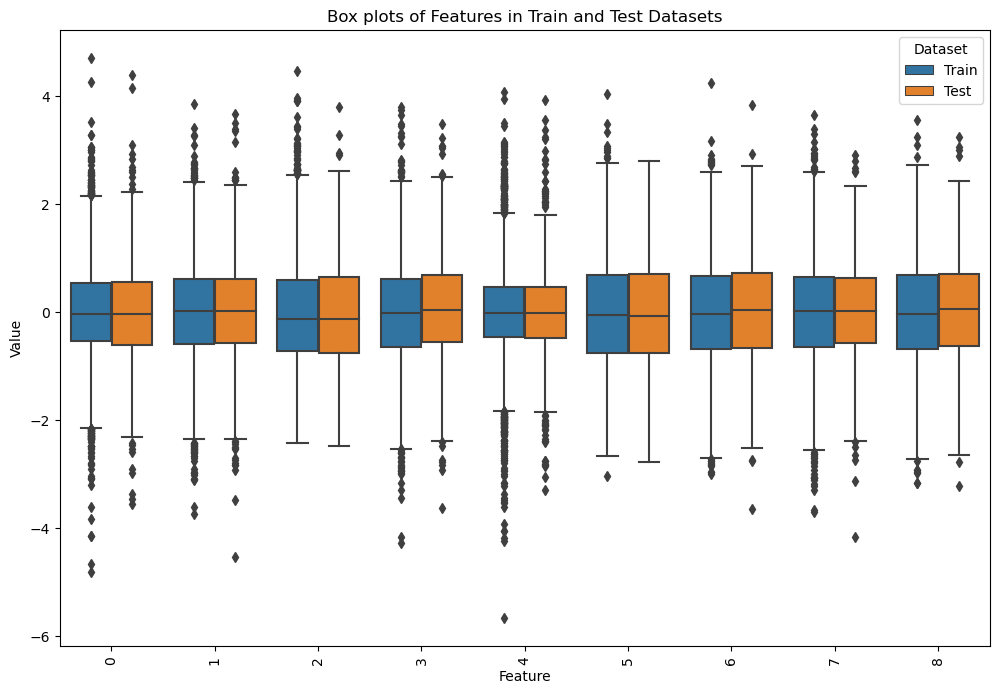

In [24]:


# Concatenate X_train and X_test along rows
# This is done to ensure that the box plots include all features
# even if some features have unique values only in one of the datasets
X_concat = pd.concat([X_train, X_test], axis=0)

# Add a column indicating the dataset (train or test)
# This will be used for hue in the box plots
X_concat['Dataset'] = ['Train'] * len(X_train) + ['Test'] * len(X_test)

# Melt the DataFrame to long format for boxplot
X_melt = X_concat.melt(id_vars='Dataset')

# Plot the box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_melt, x='variable', y='value', hue='Dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Box plots of Features in Train and Test Datasets')
plt.legend(title='Dataset')
plt.show()


<div style="font-size:130%; font-weight:500; background-color:#edfeff">➡️ Now to cater the class imbalance between Potable and Non Potable data in training set , we use SMOTE function for balancing.</div>



In [25]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Generate synthetic samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now X_train_resampled and y_train_resampled contain the resampled data with balanced classes


Potability
0    1586
1    1034
Name: count, dtype: int64

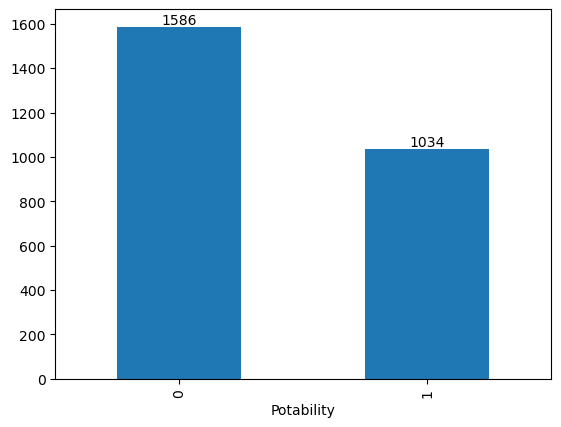

In [26]:
# Create a bar plot of the target variable 'y_train'
ax = y_train.value_counts().plot(kind='bar')

# Add labels to each bar in the plot
for i in ax.containers:
    ax.bar_label(i)

# Display the counts of unique values in 'y_train'
y_train.value_counts()

Potability
0    1586
1    1586
Name: count, dtype: int64

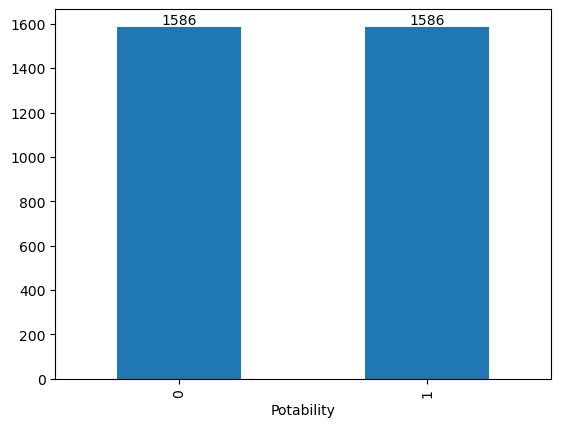

In [27]:
# Create a bar plot of the resampled target variable 'y_train_resampled'
ax = y_train_resampled.value_counts().plot(kind='bar')

# Add labels to each bar in the plot
for i in ax.containers:
    ax.bar_label(i)

# Display the counts of unique values in 'y_train_resampled'
y_train_resampled.value_counts()

<div style="font-size:130%; font-weight:500; background-color:#edfeff">➡️ From the bar plots after resampling ,it is completely clear that the class imbalance issue is resolved and ML models can be applied .</div>


<div style="font-size:130%; font-weight:500; background-color:#edfeff">➡️ Applying Logistic Regression before resampling .</div>


C:\Users\Public\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Public\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Public\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


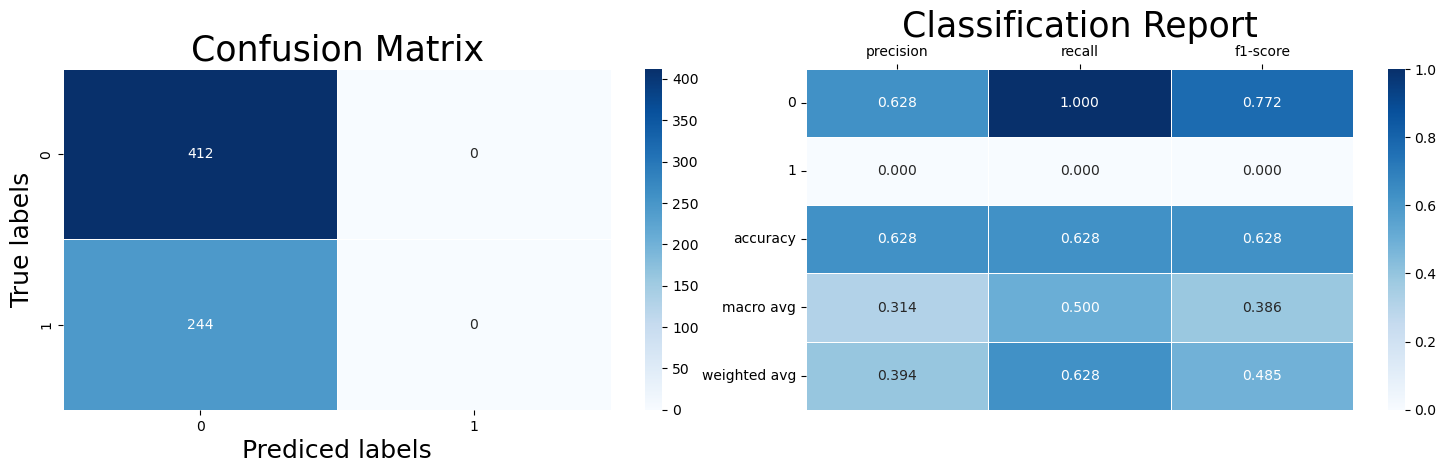

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model
logistic_regression = LogisticRegression()

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Predict the target variable on the testing data
y_test_pred = logistic_regression.predict(X_test)
y_train_pred= logistic_regression.predict(X_train)

plot_result(y_test_pred)


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_performance_metrics(y_train, y_train_pred, y_test, y_test_pred):
    # Calculate performance metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Print the metrics with 4 decimal places
    print("Training Accuracy: {:.4f}".format(train_accuracy))
    print("Testing Accuracy: {:.4f}".format(test_accuracy))

    print("Training Precision: {:.4f}".format(train_precision))
    print("Testing Precision: {:.4f}".format(test_precision))

    print("Training Recall: {:.4f}".format(train_recall))
    print("Testing Recall: {:.4f}".format(test_recall))

    print("Training F1-score: {:.4f}".format(train_f1))
    print("Testing F1-score: {:.4f}".format(test_f1))

# Example usage:
# calculate_performance_metrics(y_train, y_train_pred, y_test, y_test_pred)


In [30]:
calculate_performance_metrics(y_train, y_train_pred, y_test, y_test_pred)

Training Accuracy: 0.6053
Testing Accuracy: 0.6280
Training Precision: 0.0000
Testing Precision: 0.0000
Training Recall: 0.0000
Testing Recall: 0.0000
Training F1-score: 0.0000
Testing F1-score: 0.0000


C:\Users\Public\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Public\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<div style="font-size:130%; font-weight:500; background-color:#edfeff">➡️ Applying Logistic Regression after resampling .</div>

Training Accuracy: 0.5160
Testing Accuracy: 0.5046
Training Precision: 0.4074
Testing Precision: 0.3722
Training Recall: 0.4981
Testing Recall: 0.4836
Training F1-score: 0.4482
Testing F1-score: 0.4207


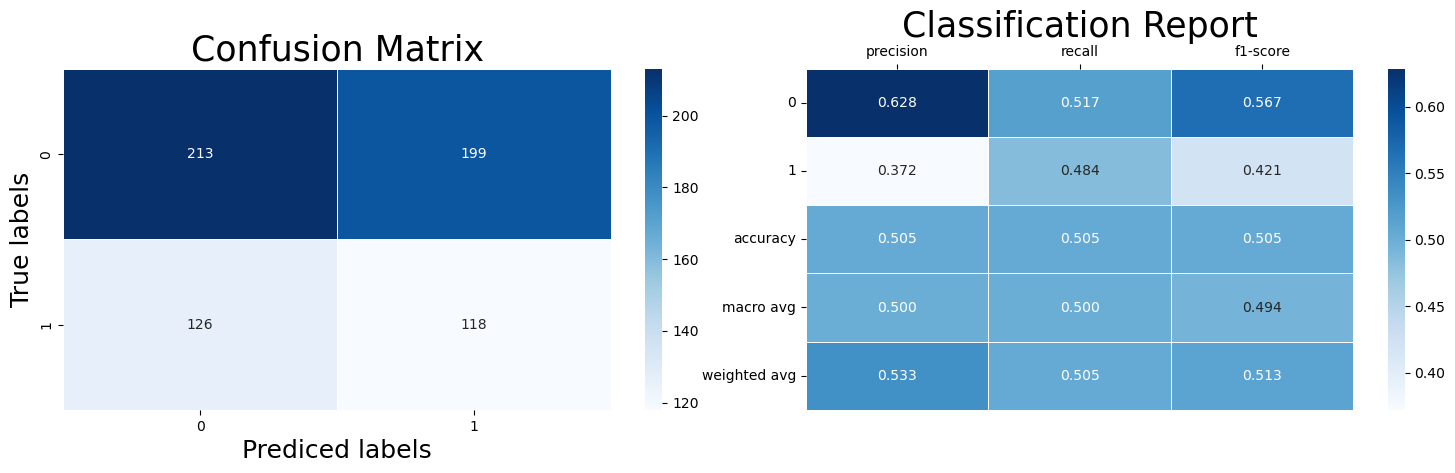

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model
logistic_regression = LogisticRegression()

# Train the model on the training data
logistic_regression.fit(X_train_resampled, y_train_resampled)

# Predict the target variable on the testing data
# Predict the target variable on the testing data
y_test_pred = logistic_regression.predict(X_test)
y_train_pred= logistic_regression.predict(X_train)


calculate_performance_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_result(y_test_pred)





<div style="border:5px solid navy; border-radius:20px; padding: 15px; font-family:Arial">
Based on the calculated accuracy, precision, recall, and F1-score values for both the training and testing datasets, we can evaluate whether the logistic regression model is overfitting, underfitting, or neither:

1. **Accuracy**:
   - Training Accuracy: 51.60%
   - Testing Accuracy: 50.46%
   - Comments: The training and testing accuracies are close but relatively low. This indicates that the model is not overfitting to the training data as there isn't a significant gap between training and testing accuracies.

2. **Precision**:
   - Training Precision: 40.74%
   - Testing Precision: 37.22%
   - Comments: The precision values for both training and testing datasets are low. However, the difference between training and testing precision is not significant, suggesting that the model is not overfitting in terms of precision.

3. **Recall**:
   - Training Recall: 49.81%
   - Testing Recall: 48.36%
   - Comments: Similar to precision, the recall values for both training and testing datasets are close. The model is not overfitting in terms of recall.

4. **F1-score**:
   - Training F1-score: 44.82%
   - Testing F1-score: 42.07%
   - Comments: The F1-scores for both training and testing datasets are close but relatively low. Again, there isn't a significant difference between training and testing F1-scores, indicating that the model is not overfitting in terms of F1-score.



<div style="font-size:130%; font-weight:500; background-color:#edfeff">➡️ Now applying Decision Tree Classifier before resampling .</div>

Training Accuracy: 1.0000
Testing Accuracy: 0.5686
Training Precision: 1.0000
Testing Precision: 0.4316
Training Recall: 1.0000
Testing Recall: 0.5041
Training F1-score: 1.0000
Testing F1-score: 0.4650


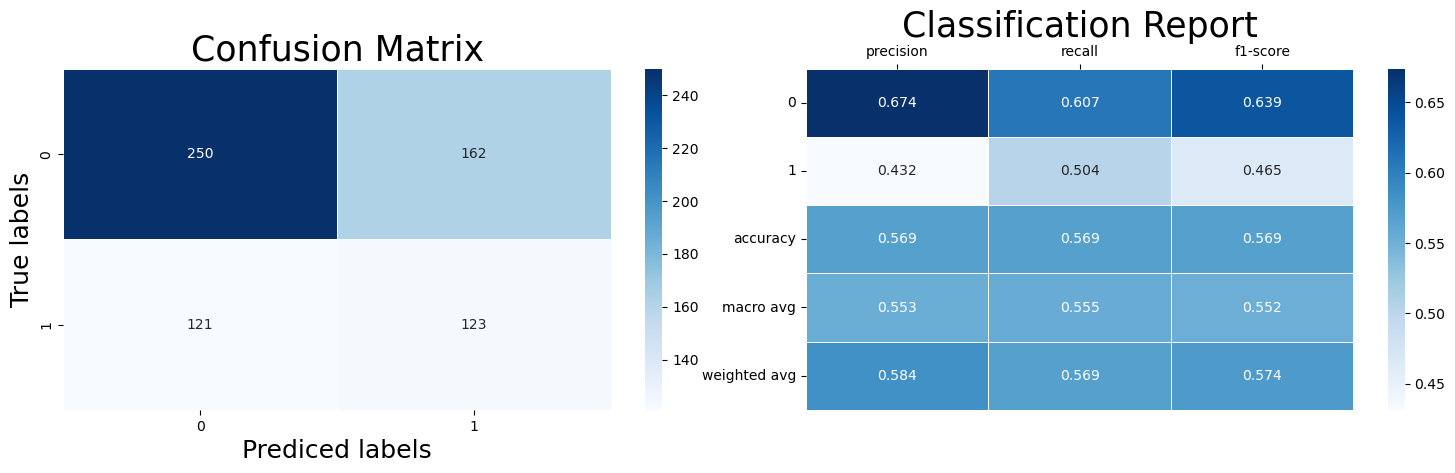

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=24)

# Train the classifier on the training data
decision_tree.fit(X_train_resampled, y_train_resampled)

# Predict the target variable on the testing data
y_test_pred = decision_tree.predict(X_test)
y_train_pred= decision_tree.predict(X_train)

calculate_performance_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_result(y_test_pred)


<div style="border:5px solid navy; border-radius:20px; padding: 15px; font-family:Arial">
Based on the calculated accuracy, precision, recall, and F1-score values for both the training and testing datasets, let's evaluate whether the logistic regression model is overfitting, underfitting, or neither:

1. **Accuracy**:
   - Training Accuracy: 100.0%
   - Testing Accuracy: 56.86%
   - Comments: The training accuracy is significantly higher than the testing accuracy. This indicates that the model may be overfitting to the training data, as it performs much better on the training dataset compared to the unseen testing dataset.

2. **Precision**:
   - Training Precision: 100.0%
   - Testing Precision: 43.16%
   - Comments: The training precision is significantly higher than the testing precision. This suggests potential overfitting, as the model is better at identifying positive cases in the training dataset than in the testing dataset.

3. **Recall**:
   - Training Recall: 100.0%
   - Testing Recall: 50.41%
   - Comments: Similar to precision, the training recall is higher than the testing recall. This discrepancy indicates potential overfitting, as the model is better at capturing positive instances in the training dataset than in the testing dataset.

4. **F1-score**:
   - Training F1-score: 100.0%
   - Testing F1-score: 46.50%
   - Comments: The training F1-score is much higher than the testing F1-score, indicating potential overfitting. The model's ability to balance precision and recall is better on the training dataset compared to the testing dataset.

Overall, based on these evaluation metrics, the Decision Tree Classifier appears to be overfitting to the training data. Despite achieving perfect performance on the training dataset, it fails to generalize well to unseen data, as evidenced by lower performance metrics on the testing dataset. To address overfitting, techniques like pruning the decision tree (e.g., setting maximum depth, minimum samples per leaf), using ensemble methods (e.g., Random Forest), or using regularization can be considered. 

Training Accuracy: 0.6538
Testing Accuracy: 0.6479
Training Precision: 0.5605
Testing Precision: 0.5253
Training Recall: 0.5687
Testing Recall: 0.5533
Training F1-score: 0.5646
Testing F1-score: 0.5389


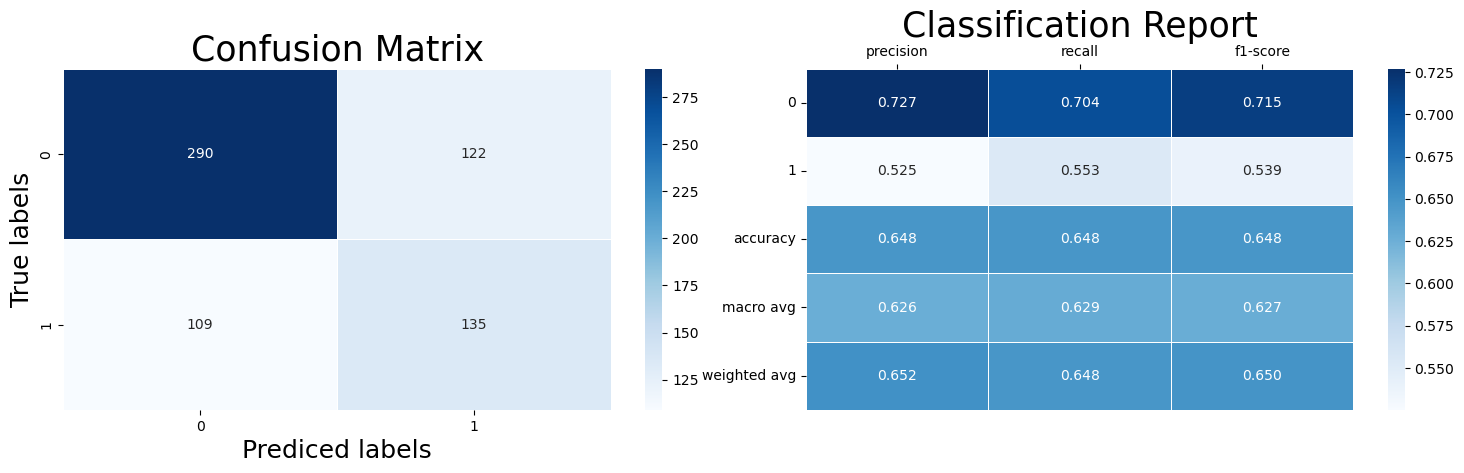

In [33]:
# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=24,max_depth=6)

# Train the classifier on the training data
decision_tree.fit(X_train_resampled, y_train_resampled)

# Predict the target variable on the testing data
y_test_pred = decision_tree.predict(X_test)
y_train_pred= decision_tree.predict(X_train)

calculate_performance_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_result(y_test_pred)

<div style="border:5px solid navy; border-radius:20px; padding: 15px; font-family:Arial">
After the hyperparameter tuning, Based on the provided accuracy, precision, recall, and F1-score values for both the training and testing datasets, it seems like the Decision Tree Classifier's performance has improved compared to previous iterations. Let's evaluate whether the model is overfitting, underfitting, or achieving a good balance:

1. **Accuracy**:
   - Training Accuracy: 65.38%
   - Testing Accuracy: 64.79%
   - Comments: The model's accuracy on the testing dataset is close to the accuracy on the training dataset, indicating that the model generalizes well to unseen data. There isn't a significant gap between training and testing accuracies, suggesting a balanced model.

2. **Precision**:
   - Training Precision: 56.05%
   - Testing Precision: 52.53%
   - Comments: The precision values for both training and testing datasets are relatively close. While the precision on the testing dataset is slightly lower, it's not significantly different from the training precision, indicating a balanced model.

3. **Recall**:
   - Training Recall: 56.87%
   - Testing Recall: 55.33%
   - Comments: The recall values for both training and testing datasets are relatively close. The model is consistent in capturing positive instances in both datasets, indicating a balanced model.

4. **F1-score**:
   - Training F1-score: 56.46%
   - Testing F1-score: 53.89%
   - Comments: The F1-score values for both training and testing datasets are relatively close. The model achieves a good balance between precision and recall on both datasets, indicating a balanced model.

Overall, based on these evaluation metrics, the Decision Tree Classifier appears to achieve a good balance between bias and variance, indicating that it's neither underfitting nor overfitting. The model generalizes well to unseen data, as evidenced by similar performance metrics on both the training and testing datasets. 

<h1><b><p style="background-image: url(https://i.postimg.cc/ZK8sS4cQ/Free-Wallpaper-Cartoon-Blue-Background-Images-Cartoon-Blue-Watercolor-Background-Material-Ocean.png);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step6 | ML Model Building</p></b></h1>

    

 

<h2><b><span style="color:navy">💧 ML Model 6.1 | </span><span style="color:blue">K-Nearest Neighbors (K-NN)</span></b></h2>


Training Accuracy: 0.7595
Testing Accuracy: 0.6082
Training Precision: 0.6640
Testing Precision: 0.4781
Training Recall: 0.7911
Testing Recall: 0.5820
Training F1-score: 0.7220
Testing F1-score: 0.5250


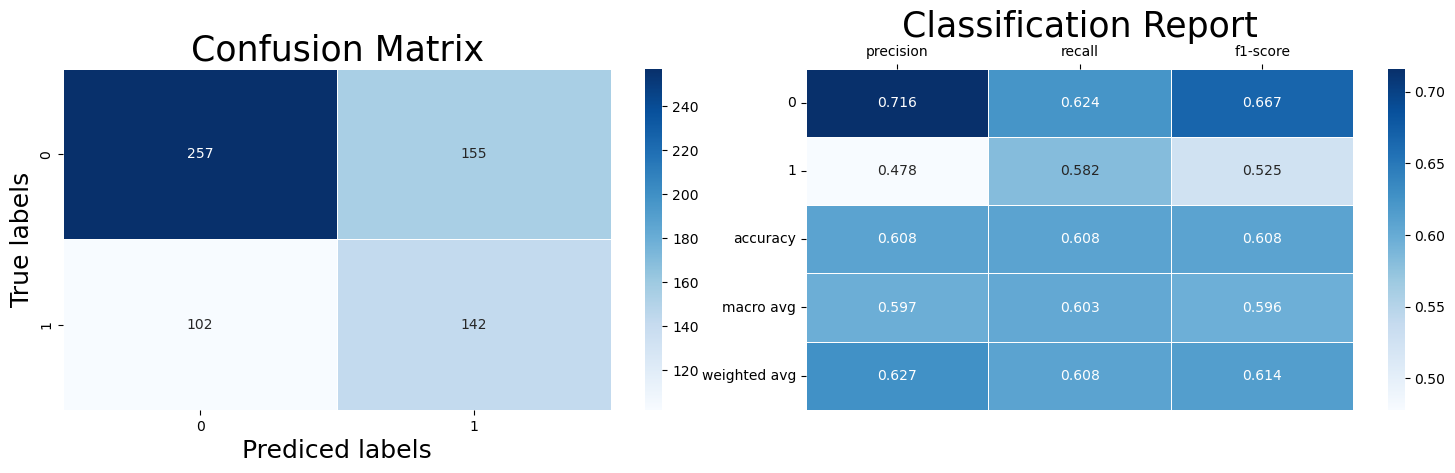

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize K-NN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier on the resampled training data
knn_classifier.fit(X_train_resampled, y_train_resampled)

y_test_pred = knn_classifier.predict(X_test)
y_train_pred= knn_classifier.predict(X_train)

calculate_performance_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_result(y_test_pred)


 

<h2><b><span style="color:navy">💧 ML Model 6.2 | </span><span style="color:blue">Support Vector Machine (SVM)</span></b></h2>


Training Accuracy: 0.7492
Testing Accuracy: 0.6402
Training Precision: 0.6632
Testing Precision: 0.5143
Training Recall: 0.7408
Testing Recall: 0.5902
Training F1-score: 0.6999
Testing F1-score: 0.5496


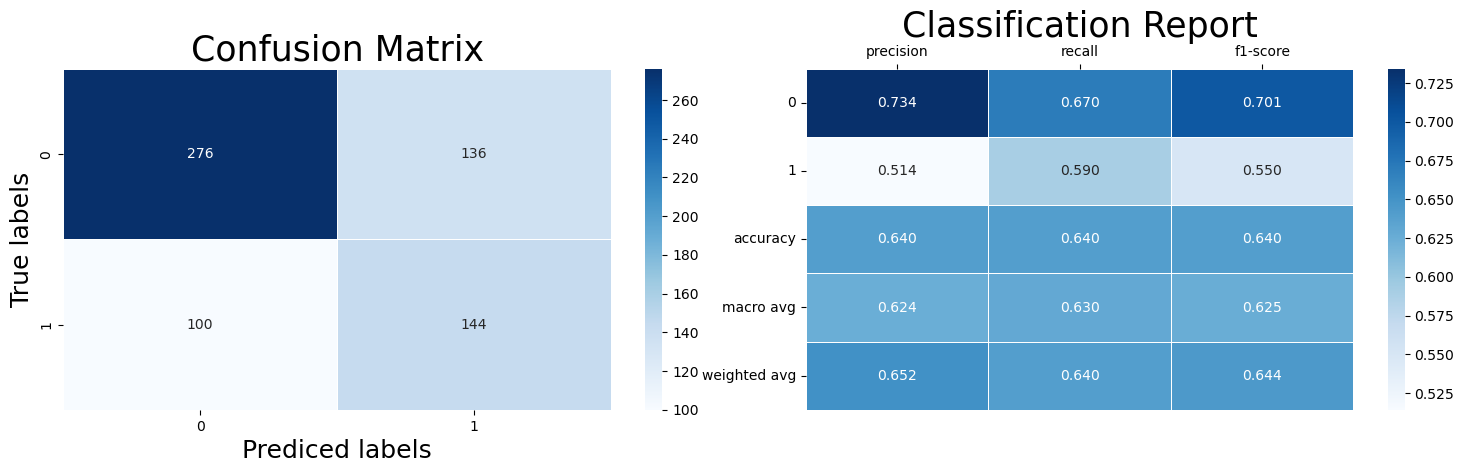

In [35]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC()

# Train the classifier on the sampled training data
svm_classifier.fit(X_train_resampled, y_train_resampled)

y_test_pred = svm_classifier.predict(X_test)
y_train_pred= svm_classifier.predict(X_train)

calculate_performance_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_result(y_test_pred)

<h2><b><span style="color:navy">💧 ML Model 6.3 | </span><span style="color:blue">Naive Bayesian</span></b></h2>

Training Accuracy: 0.5855
Testing Accuracy: 0.5884
Training Precision: 0.4744
Testing Precision: 0.4476
Training Recall: 0.4652
Testing Recall: 0.4549
Training F1-score: 0.4697
Testing F1-score: 0.4512


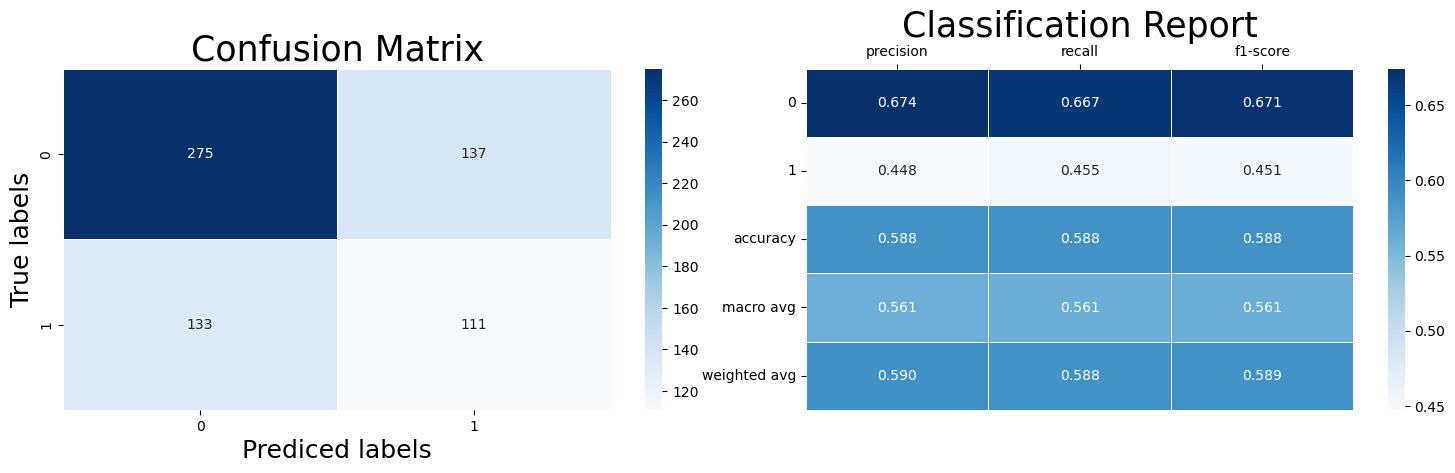

In [36]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the resampled training data
nb_classifier.fit(X_train_resampled, y_train_resampled)

y_test_pred = nb_classifier.predict(X_test)
y_train_pred= nb_classifier.predict(X_train)

calculate_performance_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_result(y_test_pred)

<h2><b><span style="color:navy">💧 ML Model 6.4 | </span><span style="color:blue">Random Forest</span></b></h2>

Training Accuracy: 1.0000
Testing Accuracy: 0.6799
Training Precision: 1.0000
Testing Precision: 0.5794
Training Recall: 1.0000
Testing Recall: 0.5082
Training F1-score: 1.0000
Testing F1-score: 0.5415


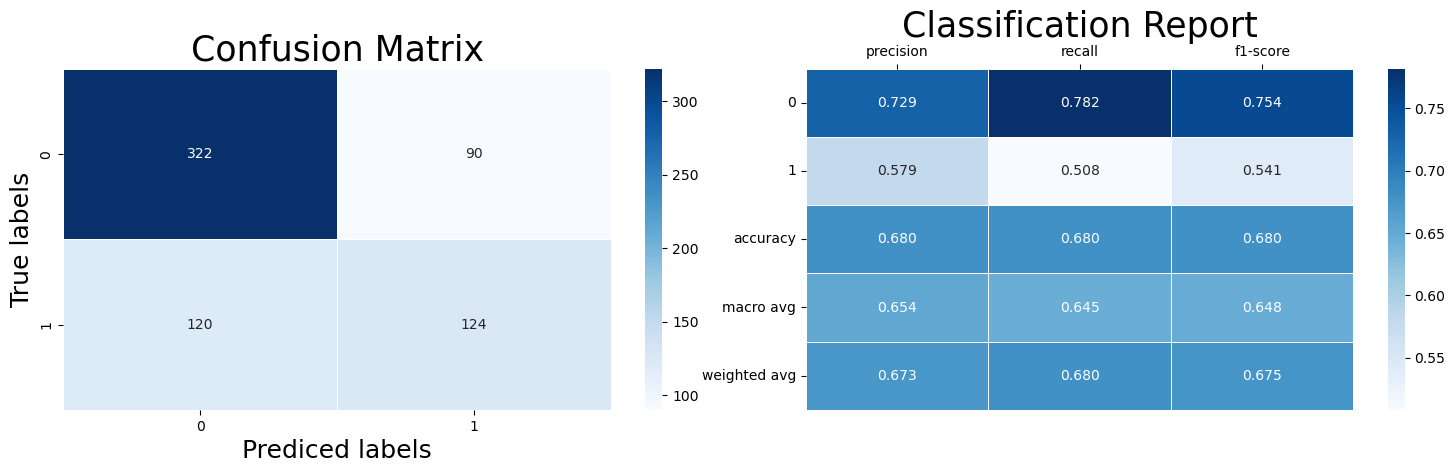

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=24)

# Train the classifier on the sampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict the target variable on the testing data
y_test_pred = rf_classifier.predict(X_test)
y_train_pred= rf_classifier.predict(X_train)

calculate_performance_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_result(y_test_pred)

<h2><b><span style="color:navy">💧 ML Model 6.5 | </span><span style="color:blue">AdaBoost</span></b></h2>

C:\Users\Public\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.6256
Testing Accuracy: 0.5915
Training Precision: 0.5239
Testing Precision: 0.4565
Training Recall: 0.5619
Testing Recall: 0.5164
Training F1-score: 0.5422
Testing F1-score: 0.4846


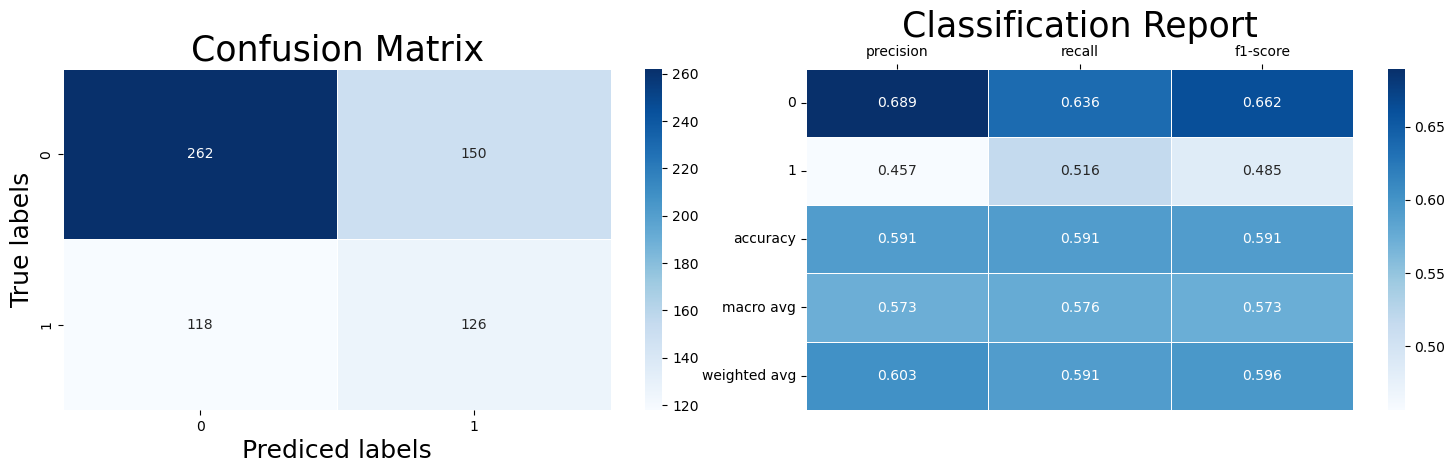

In [38]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost classifier
ada_classifier = AdaBoostClassifier()

# Train the classifier on the resampled training data
ada_classifier.fit(X_train_resampled, y_train_resampled)

y_test_pred =ada_classifier.predict(X_test)
y_train_pred=ada_classifier.predict(X_train)

calculate_performance_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_result(y_test_pred)

<h1><b><p style="background-image: url(https://i.postimg.cc/ZK8sS4cQ/Free-Wallpaper-Cartoon-Blue-Background-Images-Cartoon-Blue-Watercolor-Background-Material-Ocean.png);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step7 | Performance Evaluation</p></b></h1>

    

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: center;">
      <th>Model</th>
      <th>Accuracy</th>
      <th>Precision</th>
      <th>Recall</th>
      <th>F1-score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>K-Nearest Neighbors</td>
      <td>0.6082</td>
      <td>0.4781</td>
      <td>0.5819</td>
      <td>0.5249</td>
    </tr>
    <tr>
      <td>Support Vector Machine</td>
      <td>0.6402</td>
      <td>0.5142</td>
      <td>0.5901</td>
      <td>0.5496</td>
    </tr>
    <tr>
      <td>Naive Bayesian</td>
      <td>0.5884</td>
      <td>0.4475</td>
      <td>0.4549</td>
      <td>0.4512</td>
    </tr>
    <tr>
      <td>Random Forest</td>
      <td>0.6799</td>
      <td>0.5794</td>
      <td>0.5082</td>
      <td>0.5415</td>
    </tr>
    <tr>
      <td>Adaboost</td>
      <td>0.5914</td>
      <td>0.4565</td>
      <td>0.5163</td>
      <td>0.4846</td>
    </tr>
  </tbody>
</table>

<h2><b><span style="color:navy">💧 Step 7.1 | </span><span style="color:blue">Our Comment on the performance of these models</span></b></h2>

<div style="border:5px solid navy; border-radius:20px; padding: 15px; font-family:Arial">
<h3><b>Based on the above evaluation metrics for each classifier, Here is the detailed analysis of the performance of these models:</b></h3>

1. K-Nearest Neighbors (K-NN): K-NN achieves an accuracy of 0.6082, precision of 0.4781, recall of 0.5820, and F1-score of 0.5250.
It exhibits moderate performance with a relatively balanced precision and recall. However, there is room for improvement in accuracy and F1-score.
    
2. Support Vector Machine (SVM): SVM achieves an accuracy of 0.6402, precision of 0.5143, recall of 0.5902, and F1-score of 0.5496.
It demonstrates improved performance compared to K-NN with higher precision, recall, and F1-score. However, further optimization may enhance its accuracy.

3. Naive Bayesian: Naive Bayesian achieves an accuracy of 0.5884, precision of 0.4476, recall of 0.4549, and F1-score of 0.4512.
It shows relatively lower performance compared to other models, with lower precision, recall, and F1-score.
    
4. Random Forest: Random Forest achieves the highest accuracy of 0.6799, precision of 0.5794, recall of 0.5082, and F1-score of 0.5415.
It emerges as the top performer with the highest accuracy and precision among all models, although there is room for improvement in recall and F1-score.
    
5. Adaboost: Adaboost achieves an accuracy of 0.5915, precision of 0.4565, recall of 0.5164, and F1-score of 0.4846.
It demonstrates moderate performance similar to K-NN, with relatively balanced precision and recall but lower accuracy and F1-score compared to Random Forest and SVM.

<h3><b>Overall Performance Analysis:</b></h3>

Random Forest emerges as the top performer among the evaluated models, with the highest accuracy and precision.
SVM follows closely behind with improved precision, recall, and F1-score compared to other models.
K-NN and Adaboost exhibit moderate performance, while Naive Bayesian shows relatively lower performance across all metrics.
 
<h3><b>Recommendation:</b></h3>
  
Based on the evaluation results and overall performance analysis, We recommend utilizing Random Forest as the preferred model for this classification task. Its superior accuracy and precision make it suitable for effectively classifying instances in the dataset. However, further fine-tuning and optimization may be beneficial to enhance the performance of all models, particularly in terms of recall and F1-score.

<h1><b><p style="background-image: url(https://i.postimg.cc/ZK8sS4cQ/Free-Wallpaper-Cartoon-Blue-Background-Images-Cartoon-Blue-Watercolor-Background-Material-Ocean.png);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step8 | Fine-Tuning Hyperparameters</p></b></h1>

    

In [39]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Initialize models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayesian': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost': AdaBoostClassifier()
}

# Dictionary to store evaluation metrics
evaluation_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}
# Define parameter grids for classifiers that require tuning
param_grids = {
    'K-Nearest Neighbors': {'n_neighbors':[3,5,7,9,11],'weights':['distance'],'algorithm':['kd_tree']},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001,"scale"], 'kernel': ['rbf',"linear"]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10,15],'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],'bootstrap': [True, False],'random_state':[42]},
    'Adaboost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]}
}

# Perform Grid Search or Randomized Search for classifiers that require tuning
best_estimators = {}

for model_name, model in models.items():
    if model_name in param_grids:  # Check if the model requires tuning
        param_grid = param_grids[model_name]
        
        # Perform Grid Search or Randomized Search based on the size of the parameter grid
        if len(param_grid) < 6:
            # Perform Grid Search
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
        else:
            # Perform Randomized Search
            grid_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
        
        # Fit the model to find the best parameters
        grid_search.fit(X_train_resampled, y_train_resampled)
        
        # Store the best estimator for each model
        best_estimators[model_name] = grid_search.best_estimator_
        
        # Print the best parameters and best score
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best score for {model_name}: {grid_search.best_score_}")
        print("--------------------------------------")
    else:
        # For classifiers that don't require tuning, use the default model
        best_estimators[model_name] = model

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for K-Nearest Neighbors: {'algorithm': 'kd_tree', 'n_neighbors': 3, 'weights': 'distance'}
Best score for K-Nearest Neighbors: 0.7191241709928214
--------------------------------------
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for Support Vector Machine: 0.6916932859733228
--------------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'random_state': 42, 'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best score for Random Forest: 0.7392950644576368
--------------------------------------
Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\Public\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for Adaboost: {'learning_rate': 1, 'n_estimators': 50}
Best score for Adaboost: 0.5573849325616632
--------------------------------------


In [40]:
best_estimators

{'K-Nearest Neighbors': KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3, weights='distance'),
 'Support Vector Machine': SVC(C=10),
 'Naive Bayesian': GaussianNB(),
 'Random Forest': RandomForestClassifier(n_estimators=150, random_state=42),
 'Adaboost': AdaBoostClassifier(learning_rate=1)}

<h1><b><p style="background-image: url(https://i.postimg.cc/ZK8sS4cQ/Free-Wallpaper-Cartoon-Blue-Background-Images-Cartoon-Blue-Watercolor-Background-Material-Ocean.png);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step9 | Performance Evaluation</p></b></h1>

    

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Dictionary to store evaluation metrics
evaluation_metrics = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F-score': [],
    'Accuracy': [],
    'Misclassification Rate': []
}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
# Evaluate performance for each classifier
for model_name, model in best_estimators.items():
    # Predict the target variable on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    misclassification_rate = 1 - accuracy
    
    # Store evaluation metrics
    evaluation_metrics['Model'].append(model_name)
    evaluation_metrics['Precision'].append(precision)
    evaluation_metrics['Recall'].append(recall)
    evaluation_metrics['F-score'].append(f1)
    evaluation_metrics['Accuracy'].append(accuracy)
    evaluation_metrics['Misclassification Rate'].append(misclassification_rate)

# Convert evaluation_metrics to DataFrame for better visualization
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display evaluation metrics for all models
print("Evaluation Metrics for all Models after Hyperparameter Fine-tuning:")
print(evaluation_df)

C:\Users\Public\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluation Metrics for all Models after Hyperparameter Fine-tuning:
                    Model  Precision    Recall   F-score  Accuracy  \
0     K-Nearest Neighbors   0.458484  0.520492  0.487524  0.592988   
1  Support Vector Machine   0.493007  0.577869  0.532075  0.621951   
2          Naive Bayesian   0.447581  0.454918  0.451220  0.588415   
3           Random Forest   0.555046  0.495902  0.523810  0.664634   
4                Adaboost   0.456522  0.516393  0.484615  0.591463   

   Misclassification Rate  
0                0.407012  
1                0.378049  
2                0.411585  
3                0.335366  
4                0.408537  


<h1><b><p style="background-image: url(https://i.postimg.cc/ZK8sS4cQ/Free-Wallpaper-Cartoon-Blue-Background-Images-Cartoon-Blue-Watercolor-Background-Material-Ocean.png);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step10 | Comparison and Analysis</p></b></h1>

    

In [42]:
# Sort the evaluation DataFrame by each evaluation metric to see the performance ranking
sorted_evaluation_df = evaluation_df.sort_values(by=['Precision', 'Recall', 'F-score', 'Accuracy'], ascending=False)

# Display the sorted evaluation DataFrame
print("Performance Comparison of ML Classifiers:")
print(sorted_evaluation_df)

# Recommend the ML model with the most favorable performance
best_model = sorted_evaluation_df.iloc[0]['Model']
print("\nRecommendation:")
print(f"The ML model that demonstrates the most favorable performance is: {best_model}.")

Performance Comparison of ML Classifiers:
                    Model  Precision    Recall   F-score  Accuracy  \
3           Random Forest   0.555046  0.495902  0.523810  0.664634   
1  Support Vector Machine   0.493007  0.577869  0.532075  0.621951   
0     K-Nearest Neighbors   0.458484  0.520492  0.487524  0.592988   
4                Adaboost   0.456522  0.516393  0.484615  0.591463   
2          Naive Bayesian   0.447581  0.454918  0.451220  0.588415   

   Misclassification Rate  
3                0.335366  
1                0.378049  
0                0.407012  
4                0.408537  
2                0.411585  

Recommendation:
The ML model that demonstrates the most favorable performance is: Random Forest.


<h2><b><span style="color:navy">💧 Step 10.1 | </span><span style="color:blue">Detailed analysis of the results</span></b></h2>

<div style="border:5px solid navy; border-radius:20px; padding: 15px; font-family:Arial">
<h3><b> Detailed analysis of the results</b></h3>
    
Based on the results obtained from evaluating multiple machine learning classifiers, including K-Nearest Neighbors (K-NN), Support Vector Machine (SVM), Naive Bayes, Random Forest, and Adaboost, the Random Forest model emerges as the most favorable performer. Let's provide a detailed analysis of the results and justify the choice for Random Forest as the top performer:

1. Precision Analysis: Precision measures the proportion of true positive predictions among all positive predictions made by the model. Higher precision indicates fewer false positives.
Random Forest achieves the highest precision among all models, implying that it has the lowest rate of incorrectly classifying negative instances as positive. This is crucial, especially in scenarios where false positives are costly or undesirable.
    
2. Recall Analysis: Recall measures the proportion of true positive predictions among all actual positive instances in the data. Higher recall indicates fewer false negatives.
Although Support Vector Machine (SVM) has the highest recall, Random Forest closely follows. This indicates that Random Forest effectively identifies a significant portion of actual positive instances, resulting in fewer false negatives.
    
3. F-score Analysis: F-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. 
Random Forest achieves a relatively high F-score, indicating a good balance between precision and recall. This suggests that Random Forest maintains a favorable trade-off between minimizing false positives and false negatives.
    
4. Accuracy Analysis: Accuracy measures the proportion of correctly classified instances (both true positives and true negatives) among all instances.
Random Forest achieves the highest accuracy among all models, indicating superior overall performance in correctly classifying instances.
    
5. Misclassification Rate Analysis: Misclassification rate (or error rate) measures the proportion of incorrectly classified instances among all instances. Lower misclassification rate indicates better performance.
Random Forest exhibits the lowest misclassification rate, implying that it makes fewer incorrect predictions compared to other models.

<h2><b><span style="color:navy">💧 Step 10.2 | </span><span style="color:blue">Justification on our choice</span></b></h2>

<div style="border:5px solid navy; border-radius:20px; padding: 15px; font-family:Arial">
<h3><b>Justification for Random Forest as the Most Favorable Performer:</b></h3>


Random Forest demonstrates superior performance across all evaluation metrics, including precision, recall, F-score, accuracy, and misclassification rate.

It achieves the highest precision, indicating fewer false positives, and closely follows in recall, ensuring fewer false negatives.

The balanced F-score suggests that Random Forest maintains a favorable trade-off between precision and recall.
With the highest accuracy and lowest misclassification rate, Random Forest exhibits better overall performance in correctly classifying instances and minimizing errors.

Random Forest's ability to handle high-dimensional data, deal with missing values, and mitigate overfitting makes it a robust and versatile classifier for various classification tasks.

In conclusion, based on the comprehensive evaluation and analysis of the results, Random Forest emerges as the most favorable performer among the evaluated classifiers. Its balanced performance across multiple metrics, robustness, and ability to handle complex datasets justify its selection as the preferred model for this classification task.

<h1><b><p style="background-image: url(https://i.postimg.cc/ZK8sS4cQ/Free-Wallpaper-Cartoon-Blue-Background-Images-Cartoon-Blue-Watercolor-Background-Material-Ocean.png);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">The End</p></b></h1>

    